<a href="https://colab.research.google.com/github/samiksha2509/Samiksha_MacDonalds/blob/main/MacDonalds_Samiksha_Shardul.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import adjusted_rand_score
from scipy.stats import entropy

In [ ]:
mcdonalds = pd.read_csv('/content/mcdonalds.csv')

In [ ]:
print(mcdonalds.columns)
print(mcdonalds.shape)
print(mcdonalds.head(3))

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')
(1453, 15)
  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  


In [ ]:
MD_x = (mcdonalds.iloc[:, :11] == "Yes").astype(int)
print(MD_x.mean(axis=0).round(2))

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


In [ ]:
pca = PCA()
MD_pca = pca.fit(MD_x)
print(pca.explained_variance_ratio_)
print(pca.components_)

[0.29944723 0.19279721 0.13304535 0.08309578 0.05948052 0.05029956
 0.0438491  0.03954779 0.0367609  0.03235329 0.02932326]
[[ 0.47693349  0.15533159  0.00635636 -0.11623168 -0.3044427   0.10849325
   0.33718593  0.47151394 -0.32904173  0.21371062 -0.37475293]
 [-0.36378978 -0.016414   -0.01880869  0.03409395  0.06383884  0.0869722
   0.61063276 -0.3073178  -0.60128596 -0.07659344  0.13965633]
 [ 0.30444402  0.0625153   0.03701866  0.32235949  0.80237317  0.06464172
   0.14931026  0.28726479 -0.02439661 -0.19205128  0.08857138]
 [ 0.0551622  -0.14242496  0.19761927 -0.35413876  0.2539601  -0.09736269
   0.11895823 -0.00254696  0.06781599  0.76348804  0.36953871]
 [ 0.30753507 -0.27760805 -0.07062017  0.07340475 -0.36139895 -0.10793025
   0.12897259  0.21089912  0.00312457 -0.28784553  0.72920859]
 [-0.17073819  0.34783006  0.3550866   0.40651542 -0.20934711  0.59463206
   0.10324067  0.07691443  0.26134151  0.17822612  0.21087805]
 [-0.28051863 -0.05973793  0.70763705 -0.38594277  0.03

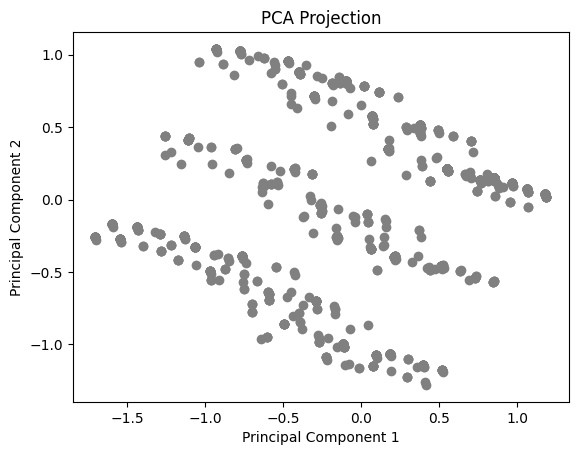

In [ ]:
transformed_data = pca.transform(MD_x)
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], c='grey')  # Explicitly select the first two components for x and y
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Projection")
plt.show()

In [ ]:
from sklearn.cluster import KMeans
np.random.seed(1234)
k_range = range(2, 9)
models = [KMeans(n_clusters=k, n_init=10, random_state=1234).fit(MD_x) for k in k_range]

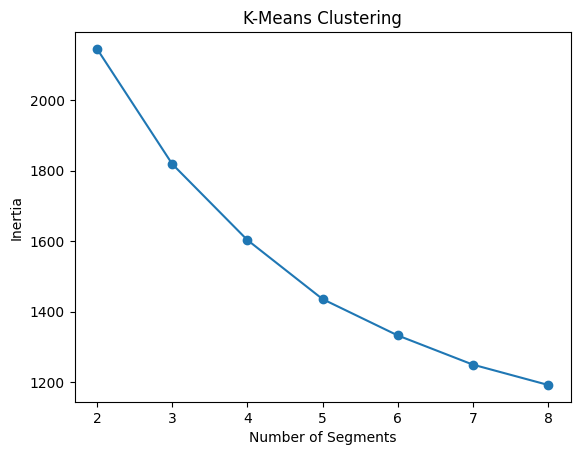

In [ ]:
inertia = [model.inertia_ for model in models]
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Segments')
plt.ylabel('Inertia')
plt.title('K-Means Clustering')
plt.show()

In [ ]:
from sklearn.utils import resample

n_boot = 100
adjusted_rand_indices = []
for k in k_range:
    model = KMeans(n_clusters=k, n_init=10, random_state=1234).fit(MD_x)
    ari_scores = []
    for _ in range(n_boot):
        boot_sample = resample(MD_x)
        boot_model = KMeans(n_clusters=k, n_init=10, random_state=1234).fit(boot_sample)
        ari_scores.append(adjusted_rand_score(model.labels_, boot_model.labels_))
    adjusted_rand_indices.append(np.mean(ari_scores))


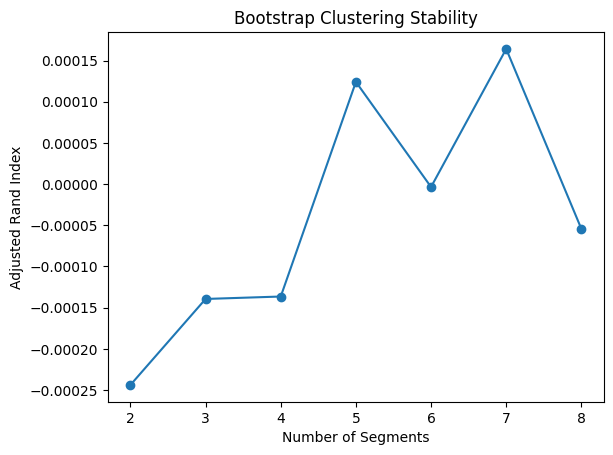

In [ ]:
plt.plot(k_range, adjusted_rand_indices, marker='o')
plt.xlabel('Number of Segments')
plt.ylabel('Adjusted Rand Index')
plt.title('Bootstrap Clustering Stability')
plt.show()

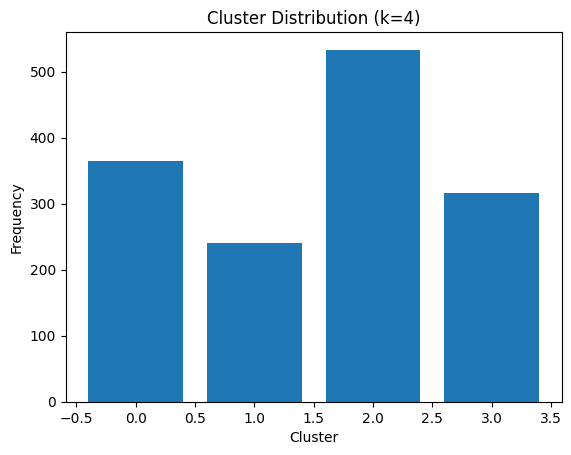

In [ ]:
k4_model = models[2]  # Assuming 4 clusters is the third model in the range
plt.hist(k4_model.predict(MD_x), bins=range(5), align='left', rwidth=0.8)
plt.xlabel('Cluster')
plt.ylabel('Frequency')
plt.title('Cluster Distribution (k=4)')
plt.show()

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
mcdonalds['Like.n'] = 6 - mcdonalds['Like'].factorize()[0]

In [ ]:
predictors = "+".join(mcdonalds.columns[:11])
formula = f"Like.n ~ {predictors}"

In [ ]:
import pandas as pd
import statsmodels.formula.api as smf

mcdonalds['Like.n'] = pd.factorize(mcdonalds['Like'])[0]
mcdonalds['Like.n'] = mcdonalds['Like.n'] / mcdonalds['Like.n'].max()  # Normalize to 0-1

formula = "Q('Like.n') ~ Q('yummy')+Q('convenient')+Q('spicy')+Q('fattening')+Q('greasy')+Q('fast')+Q('cheap')+Q('tasty')+Q('expensive')+Q('healthy')+Q('disgusting')"

model = smf.logit(formula=formula, data=mcdonalds).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.679690
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:            Q('Like.n')   No. Observations:                 1453
Model:                          Logit   Df Residuals:                     1441
Method:                           MLE   Df Model:                           11
Date:                Wed, 25 Dec 2024   Pseudo R-squ.:                 0.01172
Time:                        15:52:55   Log-Likelihood:                -987.59
converged:                       True   LL-Null:                       -999.30
Covariance Type:            nonrobust   LLR p-value:                   0.01540
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0.1060      0.293      0.361      0.718      -0.469      

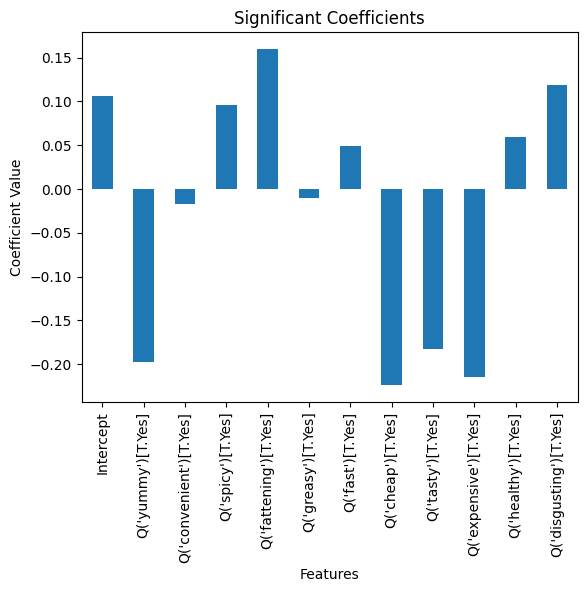

In [ ]:
model.params.plot(kind='bar')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Significant Coefficients')
plt.show()